<a href="https://colab.research.google.com/github/hongrolee/Python/blob/main/colab/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%9B%88%EB%A0%A8_%EB%B0%8F_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%85%8B_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# sn.set()

# 폰트출력
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **I. 훈련 및 테스트 세트를 통한 물고리 분류**

## 1. 데이터 읽기 및 확인

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 2. 훈련 및 테스트 세트로 분리

### 1) 섞는 과정 없이 분리 후 성능 측정

*   데이터를 섞는 과정 없이 분리하게되면 샘플링 편향 발생



### 2) 섞는 과정 후, 훈련 및 테스트 데이터 분리

## 3. 훈련 및 평가

# **II. 캘리포니아 주택가격을 통한 가격예측 모델**

## **1. 문제 정의**

*   데이터 분석의 목적을 먼저 정하는 것이 가장 중요
*   분석 목적에 따라 어떠한 데이터 전처리가 필요하며, 어떠한 머신러닝 모델을 써야할지가 결정



### 문제 내용

*   캘리포니아 주택 가격 데이터셋을 가지고 학습시켜 다른 데이터가 주어졌을 때 구역의 중간 주택 가격을 예측하는 모델을 만들어 보자.
*   **다변량 회귀**(multivariate regression)을 이용한 모델링



### 캘리포니아 주택가격이란?

*   [캘리포니아 주택 가격](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)(California Housing Prices) 데이터셋을 사용
*   1990년 캘리포니아 인구조사 데이터를 기반으로 만들어진 데이터
*   캘리포니아의 블록 그룹(block group)마다 인구(population), 중간 소득(median income), 중간 주택 가격(median housing price)등을 담고 있음


### 데이터 파이프라인

*   데이터 처리 컴포넌트(component)들이 연속되어 있는 것
*   각 컴포넌트들은 데이터를 추출해 목적에 맞게 처리하고 처리한 결과를 다른 컴포넌트나 저장소에 보내는 일련의 과정들

#### <실습> 다음은 MNIST 손글씨 데이터를 로지스틱회귀 알고리즘을 통해 학습시켜 예측모델을 만드는 과정이다. 클래스를 활용하여 파이프라인을 구현해보자.
* \__init__()
* load_data()
* preprocess()
* visualization()
* train_model()
* evaluate()
* predict()

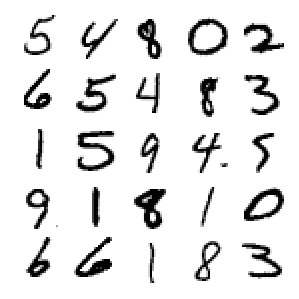

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
(train_x, train_y), (test_x, test_y) = mnist.load_data()
X = np.vstack((train_x, test_x))
X = X.reshape([-1, 28*28])
y = np.append(train_y, test_y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_train[:25], images_per_row=5)
plt.show()
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# print(f"Accuracy : {acc}")

### 성능 측정 지표 선택

회귀 문제의 대표적인 성능 지표는 **평균 제곱근 오차**(RMSE, Root Mean Square Error)

$$
\text{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m} \sum^{m}_{i=1}{\left( h \left(\mathbf{x}^{(i)} \right) - y^{(i)} \right)^{2}}}
$$

## **2. 데이터 로드 및 조회**

### 데이터 불러오기

*   housing.csv 파일 읽어오기

### 데이터 구조 확인

*   info(), describe(), head(), tail() 이용

####   value_counts()로 값들의 개수 확인

#### pandas의 hist()를 사용하여 각 특성의 값 분포 확인하기

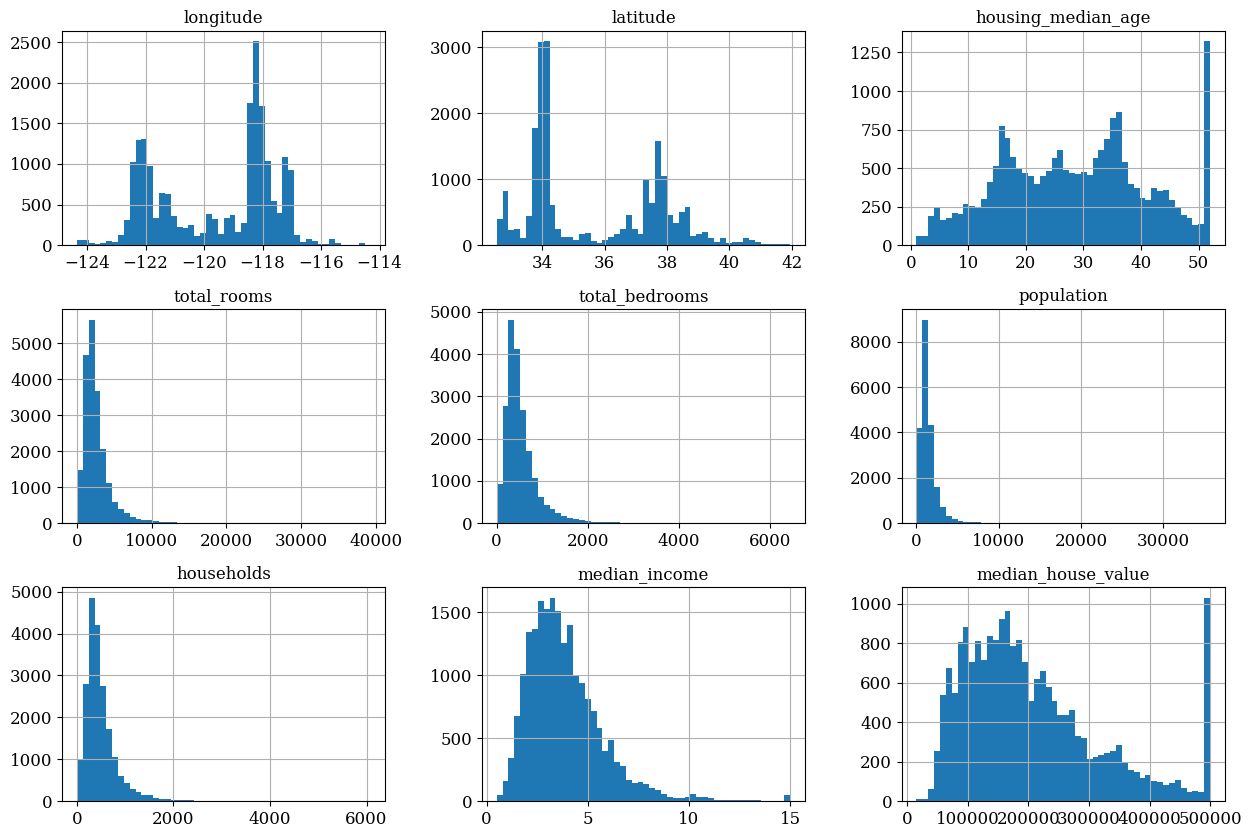

## **3. 훈련 및 테스트 세트 만들기**

1.   Numpy를 이용한 방법
2.   sklearn을 이용한 방법
3.   sklearn의 StratifiedShuffleSplit을 이용한 방법
4.   Random과 Stratified Sampling 비교해 보기
5.   샘플의 식별자를 사용하여 훈련/테스트 세트 분리






### 1) Numpy를 이용한 방법

*   np.random.permutaion



In [ ]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

4128
16512 train + 4128 test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


### 2) scikit learn을 이용한 방법
*   train_test_split을 이용한 Train/Test set 나누기
*   StratifiedShuffleSplit을 이용한 Train/Test set 나누기





16512 train + 4128 test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


### 3) sklearn의 StratifiedShuffleSplit을 이용한 방법
Train/Test set이 각 데이터를 대표할 수 있도록 고르게 샘플링 되기 위해서 **계층적 샘플링(stratified sampling)** 을 사용할 수 있다. 계층적 샘플링은 전체 모수를 계층으로 나눠 각 계층마다 샘플링을 하는 방법을 말한다.

캘리포니아 주택가격 데이터셋에서는 Train/Test set을 `median_income`을 기준으로 계층적 샘플링을 통해 Train/Test set을 나눈다.

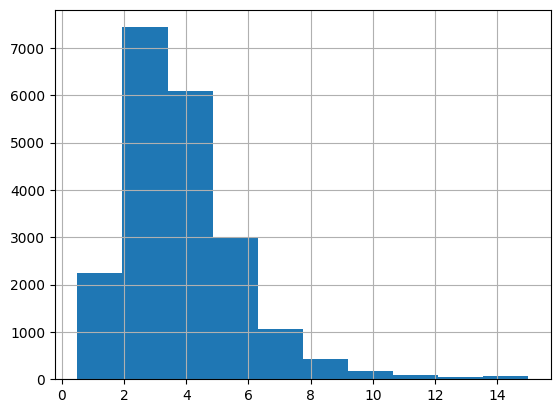

In [8]:
housing['median_income'].hist();

In [ ]:
# income 카테고리 개수를 제한하기 위해 1.5로 나눔
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [ ]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

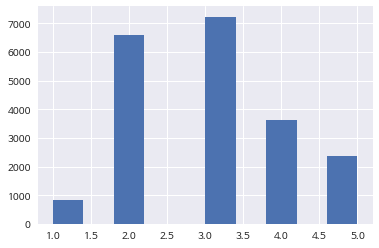

In [ ]:
housing["income_cat"].hist();

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
display(housing['income_cat'].value_counts() / len(housing))
print('='*20)
display(strat_test_set['income_cat'].value_counts() / len(strat_test_set))

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

### 4) Random과 Stratified Sampling 비교해 보기

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [ ]:
# 분석에 필요없는 'income_cat' Column 삭제
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 5) 샘플의 식별자를 사용하여 훈련/테스트 세트 분리

In [ ]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
housing_with_id = housing.reset_index()  # 'index'열이 추가된 df가 반환됨
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [ ]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


## **4. 데이터 이해를 위한 탐색과 시각화**

In [10]:
# Train set에 대해서만 진행
housing = train_set.copy()

### 1) 지리적 데이터 시각화

[Text(0.5, 0, 'Longitude'), Text(0, 0.5, 'Latitude')]

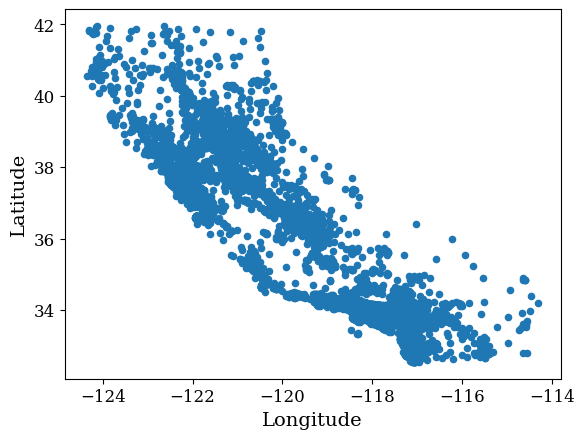

`alpha` 인자를 이용해 데이터 포인트가 밀집된 영역을 표현할 수 있다.

[Text(0.5, 0, 'Longitude'), Text(0, 0.5, 'Latitude')]

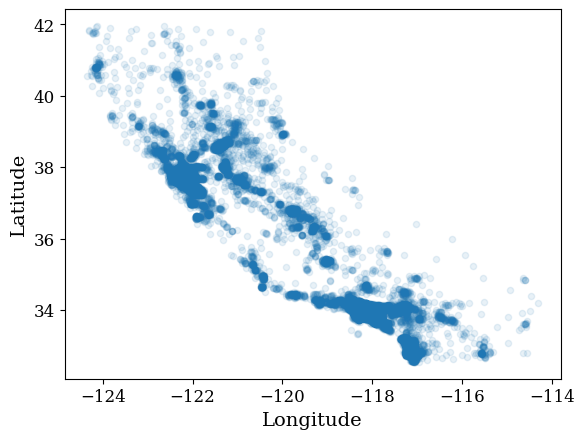

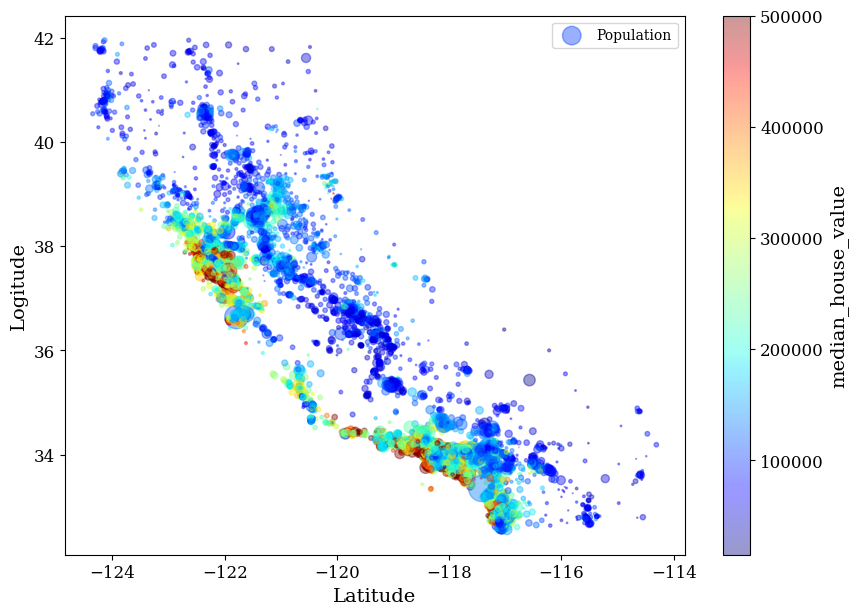

### 2) 상관관계 조사

특성(feature)간의 **표준 상관계수**(standard correlation coefficient, 피어슨의 $r$) `corr()`를 사용한다.

<ipython-input-30-51a0e6bf2eb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.690647
income_cat            0.646710
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

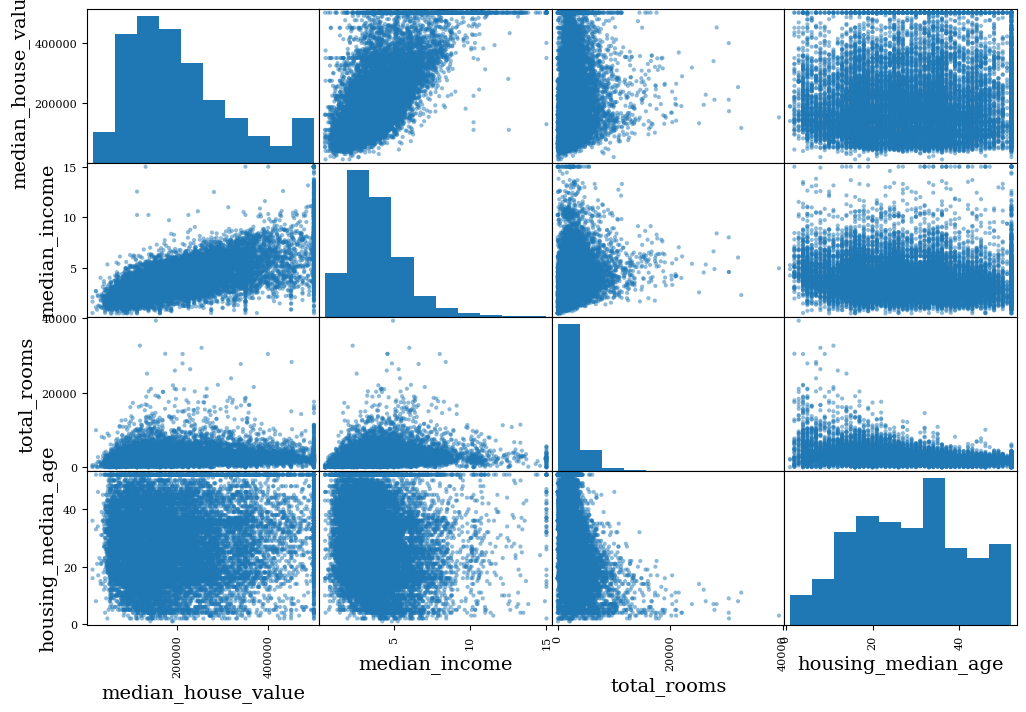

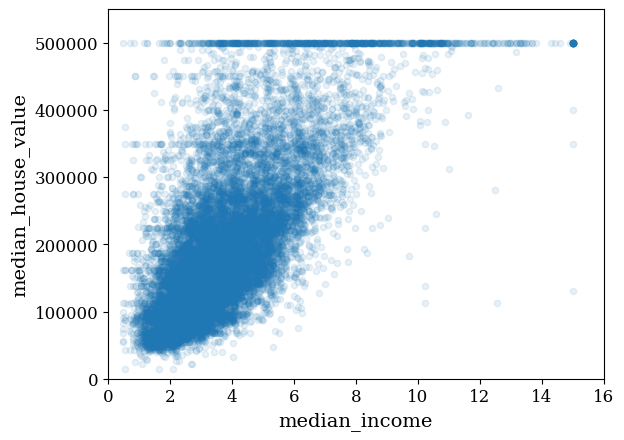

### 3) 특성 조합으로 새로운 특성 생성

*   가구 당 방 수
*   방 당 침실 수
*   가구 당 인구 수



<ipython-input-34-51a0e6bf2eb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.690647
income_cat                  0.646710
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64